In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plot

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

# Part 1: Collect Philadelphia Location Data

### Gather Neighborhoods (https://en.wikipedia.org/wiki/List_of_Philadelphia_neighborhoods)

In [3]:
# fetch data file
my_file = project.get_file("PhiladelphiaNeighborhoods2.csv")
# read data into pandas dataframe
my_file.seek(0)
philly_neighborhoods = pd.read_csv(my_file, nrows=12)

In [4]:
philly_neighborhoods.head()
print(philly_neighborhoods.shape)

(12, 2)


In [5]:
new_neighborhoods = pd.DataFrame(columns = ['Region', 'Neighborhood'])
for index, row in philly_neighborhoods.iterrows():
    split = row['Neighborhood'].split(', ')
    for neighborhood in split:
        new_neighborhoods = new_neighborhoods.append(pd.DataFrame({'Region':[row['Region']], 'Neighborhood':[neighborhood]}))
        
new_neighborhoods = new_neighborhoods.reset_index(drop=True)
print(new_neighborhoods)

                                  Region                        Neighborhood
0                            Center City                  Avenue of the Arts
1                            Center City                          Callowhill
2                            Center City                           Chinatown
3                            Center City                     Elfreth's Alley
4                            Center City                      French Quarter
5                            Center City                        Logan Square
6                            Center City                        Naval Square
7                            Center City                       Jeweler's Row
8                            Center City                         Market East
9                            Center City                            Old City
10                           Center City                     Museum District
11                           Center City                         Penn Center

In [6]:
new_neighborhoods.shape

(164, 2)

### Determine latitude, longitude of each neighborhood

In [90]:
#address = 'Callowhill, Pennsylvania'

#geolocator = Nominatim(user_agent="ny_explorer")
##location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('The geographical coordinates are {}, {}'.format(latitude, longitude))

The geographical coordinates are 39.96700525, -75.23670145


In [7]:
philly_locations = ['Region', 'Neighborhood', 'Latitude', 'Longitude']
new_neighborhoods = new_neighborhoods.reindex(columns = philly_locations)
new_neighborhoods.head()

,Region,Neighborhood,Latitude,Longitude
0,Center City,Avenue of the Arts,NaN,NaN
1,Center City,Callowhill,NaN,NaN
2,Center City,Chinatown,NaN,NaN
3,Center City,Elfreth's Alley,NaN,NaN
4,Center City,French Quarter,NaN,NaN


In [8]:
df_index = new_neighborhoods.index
num_rows = len(df_index)
num_rows
for index, row in new_neighborhoods.iterrows():
    name = row.Neighborhood
    name = name + ", Philadelphia, Pennsylvania"
    
    address = name
    print(address)
    
    geolocator = Nominatim(user_agent = "ny_explorer")
    location = geolocator.geocode(address)
    print(location)
    if location == None:
        print("no data for {}".format(address))
    else:
        latitude = location.latitude
        longitude = location.longitude
        row.Latitude = latitude
        row.Longitude = longitude
        new_neighborhoods.at[index,'Latitude'] = row.Latitude
        new_neighborhoods.at[index,'Longitude'] = row.Longitude

Avenue of the Arts, Philadelphia, Pennsylvania
None
no data for Avenue of the Arts, Philadelphia, Pennsylvania
Callowhill, Philadelphia, Pennsylvania
SEPTA Callowhill Trolley Depot, Philadelphia, Philadelphia County, Pennsylvania, United States of America
Chinatown, Philadelphia, Pennsylvania
Chinatown, Philadelphia, Pennsylvania, United States of America
Elfreth's Alley, Philadelphia, Pennsylvania
Elfreths Alley, Society Hill, Philadelphia, Philadelphia County, Pennsylvania, 19106, United States of America
French Quarter, Philadelphia, Pennsylvania
None
no data for French Quarter, Philadelphia, Pennsylvania
Logan Square, Philadelphia, Pennsylvania
Logan Circle, Spring Garden, Philadelphia, Philadelphia County, Pennsylvania, United States of America
Naval Square, Philadelphia, Pennsylvania
Naval Square, South Philadelphia, Philadelphia, Philadelphia County, Pennsylvania, United States of America
Jeweler's Row, Philadelphia, Pennsylvania
None
no data for Jeweler's Row, Philadelphia, Pen

In [9]:
refined_neighborhoods = new_neighborhoods.copy()
refined_neighborhoods.shape

(164, 4)

Remove any neighborhoods from data set for which a set of coordinates was not found

In [10]:
refined_neighborhoods.dropna(inplace=True)
#index_name1 = refined_neighborhoods[refined_neighborhoods['Neighborhood'] == 'Little Saigon'].index
#refined_neighborhoods.drop(index_name1, inplace=True)
refined_neighborhoods.reset_index(drop=True, inplace=True)
refined_neighborhoods.shape

(155, 4)

In [11]:
refined_neighborhoods

,Region,Neighborhood,Latitude,Longitude
0,Center City,Callowhill,39.967005,-75.236701
1,Center City,Chinatown,39.953446,-75.154622
2,Center City,Elfreth's Alley,39.952712,-75.141980
3,Center City,Logan Square,39.958125,-75.170560
4,Center City,Naval Square,39.943959,-75.184315
5,Center City,Market East,40.076910,-75.018972
6,Center City,Old City,39.952724,-75.163526
7,Center City,Museum District,39.955115,-75.160287
8,Center City,Penn Center,39.947313,-75.143967
9,Center City,Rittenhouse Square,39.949470,-75.171884


### View all neighborhoods

In [12]:
Philly_address = 'Philadelphia, Pennsylvania'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(Philly_address)
latitudeP = location.latitude
longitudeP = location.longitude

# create map of Philadelphia
map_philly = folium.Map(location=[latitudeP, longitudeP], zoom_start=11)

# add neighborhood markers to map
for lat, lng, region, neighborhood in zip(refined_neighborhoods['Latitude'], refined_neighborhoods['Longitude'], refined_neighborhoods['Region'], refined_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='3dd976',
        fill_opacity=0.6,
        parse_html=False).add_to(map_philly)
    
map_philly

# Part 2: Find Restaurant Information

### Foursquare API 

In [13]:
# folium credentials
CLIENT_ID = 'IYWAZEOEBFZSGQFCKBQ4CTF1U1NLKXD12ITCJFQ5BUAADUZO' # your Foursquare ID
CLIENT_SECRET = '2A5DDWUUFA0GY1WNMJMSMIFP4E0MBSMP1YJQXDIYDE3TLUPM' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
catID = '4d4b7105d754a06374d81259'  # limit Foursquare searches to anything within the "Food" category

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IYWAZEOEBFZSGQFCKBQ4CTF1U1NLKXD12ITCJFQ5BUAADUZO
CLIENT_SECRET:2A5DDWUUFA0GY1WNMJMSMIFP4E0MBSMP1YJQXDIYDE3TLUPM


In [14]:
# define a function to locate venues near each neighborhood in data set
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        #create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']
    return(nearby_venues)

In [15]:
LIMIT=250
radius=750

initial_venues = getNearbyVenues(names=refined_neighborhoods['Neighborhood'], 
                                latitudes=refined_neighborhoods['Latitude'],
                                longitudes=refined_neighborhoods['Longitude'])


Callowhill
Chinatown
Elfreth's Alley
Logan Square
Naval Square
Market East
Old City
Museum District
Penn Center
Rittenhouse Square
Fitler Square
Penn's Landing
Society Hill
South Street
Washington Square West
Bella Vista
Central South Philadelphia
Devil's Pocket
Dickinson Square West
East Passyunk Crossing
Franklin Delano Roosevelt Park
Grays Ferry
Hawthorne
Italian Market
Lower Moyamensing
Marconi Plaza
Moyamensing
Packer Park
Passyunk Square
Pennsport
Point Breeze
Queen Village
Schuylkill
Sports Complex
Tasker
Wharton
Whitman
Wilson Park
West Passyunk
Southwark
Graduate Hospital
Angora
Bartram Village
Clearview
Kingsessing
Eastwick
Elmwood Park
Hedgerow
Mount Moriah
Paschall
Philadelphia International Airport
Penrose
Southwest Schuylkill
Hog Island
Belmont District
Belmont Village
Carroll Park
Cathedral Park
Cedar Park
Centennial District
Dunlap
Garden Court
Haddington
Haverford North
Mantua
Mill Creek
Overbrook
Overbrook Park
Parkside
Powelton Village
Saunders Park
Spruce Hill
Unive

In [16]:
# Create dataframe of breakfast venues before any analyses
name = 'Caf' + '\u00E9'

options = ['Coffee Shop', 'Donut Shop', name, 'Breakfast Spot', 'Bagel Shop', 'Diner']
result_df = initial_venues[initial_venues['Venue Category'].isin(options)]
result_df.reset_index(drop=True, inplace=True)
print(result_df.shape)
result_df.head()

(335, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chinatown,39.953446,-75.154622,Pagano's Market,39.951483,-75.153527,Breakfast Spot
1,Chinatown,39.953446,-75.154622,Beiler's Doughnuts,39.953697,-75.159307,Donut Shop
2,Chinatown,39.953446,-75.154622,Dutch Eating Place,39.953728,-75.159239,Breakfast Spot
3,Chinatown,39.953446,-75.154622,La Colombe Torrefaction,39.950563,-75.150758,Coffee Shop
4,Chinatown,39.953446,-75.154622,Hershey’s Cafe,39.951801,-75.149888,Café


### (A) Sort Neighborhoods by all Venue Types

In [17]:
print(initial_venues.shape)
initial_venues.head()

(3826, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Callowhill,39.967005,-75.236701,GiGi's Soul Food,39.969707,-75.238903,Southern / Soul Food Restaurant
1,Callowhill,39.967005,-75.236701,Just To Serve You,39.970552,-75.233362,Southern / Soul Food Restaurant
2,Callowhill,39.967005,-75.236701,Citizens Bank,39.966597,-75.232675,Bank
3,Callowhill,39.967005,-75.236701,Family Dollar,39.966712,-75.232872,Discount Store
4,Callowhill,39.967005,-75.236701,Save-A-Lot,39.966479,-75.233145,Grocery Store


In [18]:
all_plot = initial_venues.groupby('Neighborhood').count()
all_plot.reset_index()
all_plot = all_plot.sort_values('Venue')

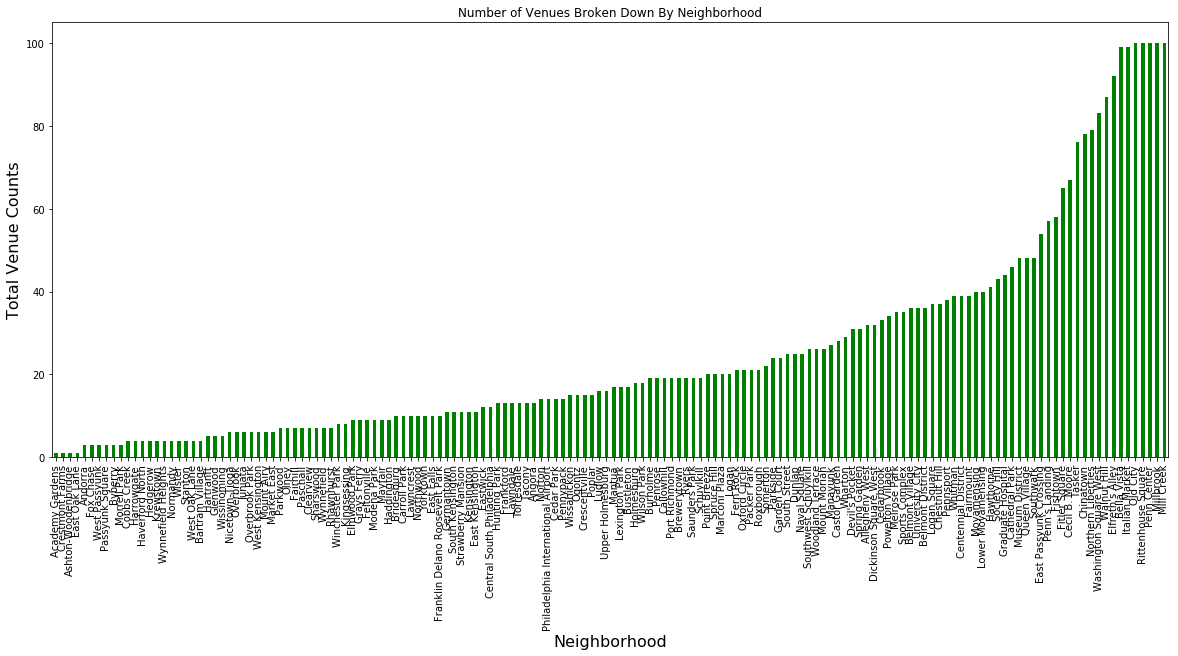

In [57]:
### create visualization of neighborhood vs venue count (bar graph) ###
plt_resultA = all_plot['Venue'].plot(kind='bar',figsize=(20,8), color='green', title="Number of Venues Broken Down By Neighborhood")
plt_resultA.set_xlabel("Neighborhood", fontsize=16)
plt_resultA.set_ylabel("Total Venue Counts", fontsize=16)
plot.show()

Analyze each neigbhorhood

In [20]:
print('There are {} unique categories.'.format(len(initial_venues['Venue Category'].unique())))

There are 307 unique categories.


In [21]:
### all venues, not just specialized ones
philly_onehot = pd.get_dummies(initial_venues[['Venue Category']], prefix="", prefix_sep="")

philly_onehot['Neighborhood'] = initial_venues['Neighborhood']

fixed_columns = [philly_onehot.columns[-1]] + list(philly_onehot.columns[:-1])
philly_onehot = philly_onehot[fixed_columns]

philly_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Betting Shop,Big Box Store,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Basketball Court,College Bookstore,College Gym,College Hockey Rink,College Quad,College Stadium,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cultural Center,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,National Park,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaur

In [22]:
philly_onehot.shape

(3826, 308)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [23]:
philly_grouped = philly_onehot.groupby('Neighborhood').mean().reset_index()
philly_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Betting Shop,Big Box Store,Bistro,Board Shop,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Basketball Court,College Bookstore,College Gym,College Hockey Rink,College Quad,College Stadium,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cultural Center,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,National Park,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Roller Rink,Salad Place,Salon / Barbershop,Sandwich Place,Sausage Shop,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaur

In [24]:
philly_grouped.shape

(154, 308)

In [25]:
# top five venues in each neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = philly_grouped['Neighborhood']

for ind in np.arange(philly_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(philly_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Academy Gardens,Garden,Zoo Exhibit,Event Space,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant
1,Allegheny West,Intersection,Fast Food Restaurant,Sandwich Place,Grocery Store,Gym / Fitness Center,Kitchen Supply Store,Buffet,Dry Cleaner,Shopping Plaza,Donut Shop
2,Andorra,Construction & Landscaping,Playground,Art Gallery,Donut Shop,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant
3,Angora,Chinese Restaurant,Park,Road,Light Rail Station,Breakfast Spot,Discount Store,Grocery Store,Sandwich Place,Train Station,Supermarket
4,Ashton-Woodenbridge,Garden,Zoo Exhibit,Event Space,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant
5,Bartram Village,Garden,Seafood Restaurant,Platform,Bus Stop,Dog Run,Drugstore,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store
6,Bella Vista,Mexican Restaurant,Italian Restaurant,Pizza Place,Coffee Shop,Vietnamese Restaurant,Bakery,Gourmet Shop,French Restaurant,Bar,Thai Restaurant
7,Belmont District,Breakfast Spot,Noodle House,Hotel,Park,Grocery Store,Tea Room,Malay Restaurant,Market,Bubble Tea Shop,Monument / Landmark
8,Belmont Village,Breakfast Spot,Noodle House,Hotel,Park,Grocery Store,Tea Room,Malay Restaurant,Market,Bubble Tea Shop,Monument / Landmark
9,Brewerytown,Café,Deli / Bodega,Brewery,Ethiopian Restaurant,Tea Room,Chinese Restaurant,Liquor Store,Light Rail Station,Spa,Discount Store


### (B) Sort Neighborhoods by Breakfast Venues

In [27]:
result_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chinatown,39.953446,-75.154622,Pagano's Market,39.951483,-75.153527,Breakfast Spot
1,Chinatown,39.953446,-75.154622,Beiler's Doughnuts,39.953697,-75.159307,Donut Shop
2,Chinatown,39.953446,-75.154622,Dutch Eating Place,39.953728,-75.159239,Breakfast Spot
3,Chinatown,39.953446,-75.154622,La Colombe Torrefaction,39.950563,-75.150758,Coffee Shop
4,Chinatown,39.953446,-75.154622,Hershey’s Cafe,39.951801,-75.149888,Café


In [28]:
result_plot = result_df.groupby('Neighborhood').count()
result_plot.reset_index()
result_plot = result_plot.sort_values('Venue')

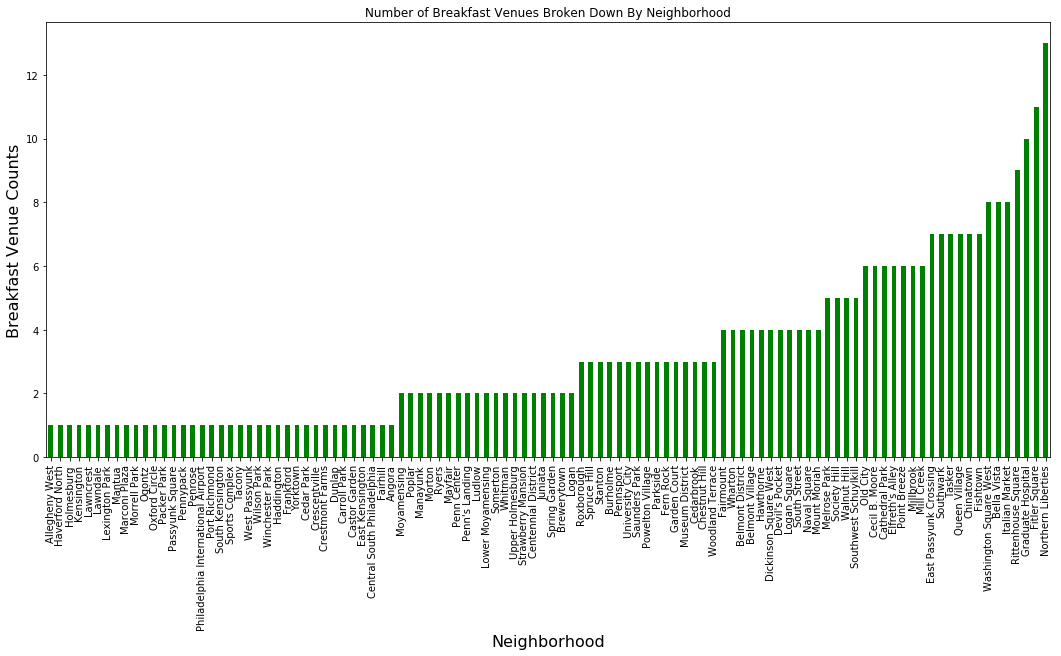

In [29]:
### create visualization of neighborhood vs venue count (bar graph) ###
plt_result = result_plot['Venue'].plot(kind='bar',figsize=(18,8), color='green', title="Number of Breakfast Venues Broken Down By Neighborhood")
plt_result.set_xlabel("Neighborhood", fontsize=16)
plt_result.set_ylabel("Breakfast Venue Counts", fontsize=16)
plot.show()

Analyze each neigbhorhood after filtering out anything aside from breakfast spots/ cafes

In [30]:
print('There are {} uniques categories.'.format(len(result_df['Venue Category'].unique())))

There are 6 uniques categories.


In [31]:
philly_onehotB = pd.get_dummies(result_df[['Venue Category']], prefix="", prefix_sep="")
philly_onehotB['Neighborhood'] = result_df['Neighborhood']
fixed_columnsB = [philly_onehotB.columns[-1]] + list(philly_onehotB.columns[:-1])
philly_onehotB = philly_onehotB[fixed_columns]

philly_onehotB.head()

KeyError: '[\'Yoga Studio\', \'South Indian Restaurant\', \'Bus Stop\', \'Building\', \'Event Space\', \'Gym\', \'Restaurant\', \'Auto Garage\', \'State / Provincial Park\', \'Train Station\', \'Laundromat\', \'Food Service\', \'Park\', \'South American Restaurant\', \'Laundry Service\', \'Cambodian Restaurant\', \'Moving Target\', \'Churrascaria\', \'Food & Drink Shop\', \'Performing Arts Venue\', \'Seafood Restaurant\', \'Mediterranean Restaurant\', \'Vegetarian / Vegan Restaurant\', \'Frozen Yogurt Shop\', \'Trail\', \'Sushi Restaurant\', \'Train\', \'Video Game Store\', \'Deli / Bodega\', \'Shanghai Restaurant\', \'Juice Bar\', \'Shopping Mall\', \'Road\', \'Japanese Restaurant\', \'Cafeteria\', \'Student Center\', \'Antique Shop\', \'Lebanese Restaurant\', \'Theme Park\', \'Beach\', \'Vietnamese Restaurant\', \'Cocktail Bar\', \'Bubble Tea Shop\', \'Piano Bar\', \'Grocery Store\', \'Platform\', \'Wine Shop\', \'Taco Place\', \'Video Store\', \'Boat or Ferry\', \'Light Rail Station\', \'Optical Shop\', \'Bistro\', \'Office\', \'Dive Bar\', \'Taiwanese Restaurant\', \'Nightclub\', \'Peruvian Restaurant\', \'Indian Restaurant\', \'Steakhouse\', \'Sausage Shop\', \'Radio Station\', \'Whisky Bar\', \'Moroccan Restaurant\', \'Wine Bar\', \'Newsstand\', \'Shoe Store\', \'Golf Course\', \'Pakistani Restaurant\', \'Outdoor Sculpture\', \'Storage Facility\', \'Greek Restaurant\', \'Chinese Restaurant\', \'Indonesian Restaurant\', \'Fast Food Restaurant\', \'Gas Station\', \'Boutique\', "Men\'s Store", \'Szechuan Restaurant\', \'Hot Dog Joint\', \'Spanish Restaurant\', \'French Restaurant\', \'Bookstore\', \'Korean Restaurant\', \'Science Museum\', \'Concert Hall\', \'Tourist Information Center\', \'Filipino Restaurant\', \'Shop & Service\', \'Church\', \'Disc Golf\', \'Hotel\', \'Southern / Soul Food Restaurant\', \'Lawyer\', \'Cuban Restaurant\', \'Asian Restaurant\', \'Candy Store\', \'Music Venue\', \'Bar\', \'Pharmacy\', \'Pet Store\', \'Arts & Entertainment\', \'Smoothie Shop\', \'Sports Club\', \'Travel & Transport\', \'Eastern European Restaurant\', \'Zoo Exhibit\', \'Plaza\', \'Argentinian Restaurant\', \'High School\', \'Skate Park\', \'Waterfront\', \'Baseball Stadium\', \'Bank\', \'Toy / Game Store\', \'Ethiopian Restaurant\', \'Kids Store\', \'Post Office\', \'Drugstore\', \'Gym / Fitness Center\', \'African Restaurant\', \'Dog Run\', \'Residential Building (Apartment / Condo)\', \'Brewery\', \'IT Services\', \'Dim Sum Restaurant\', \'Supermarket\', \'American Restaurant\', \'Electronics Store\', \'Movie Theater\', "Doctor\'s Office", \'Thai Restaurant\', \'Modern European Restaurant\', \'Hockey Rink\', \'Department Store\', \'Ice Cream Shop\', \'Pool\', \'Buffet\', \'Garden Center\', \'Garden\', \'Track\', \'Burger Joint\', \'Beer Store\', \'Gun Range\', \'Snack Place\', \'Business Service\', \'Airport Terminal\', \'Skating Rink\', \'Cheese Shop\', \'Beer Bar\', \'Mattress Store\', \'Theme Park Ride / Attraction\', \'Stadium\', \'Gourmet Shop\', \'Beer Garden\', \'Food Truck\', \'Public Art\', \'Pizza Place\', \'Cultural Center\', "Women\'s Store", \'Comedy Club\', \'Karaoke Bar\', \'Boarding House\', \'Arcade\', \'Gift Shop\', \'College Basketball Court\', \'Roller Rink\', \'College Arts Building\', \'ATM\', \'New American Restaurant\', \'Bowling Alley\', \'Art Gallery\', \'Art Museum\', \'Climbing Gym\', \'BBQ Joint\', \'Mobile Phone Shop\', \'Souvenir Shop\', \'Liquor Store\', \'Shopping Plaza\', \'Tennis Court\', \'Baseball Field\', \'National Park\', \'Boat Rental\', \'Scenic Lookout\', \'Miscellaneous Shop\', \'Noodle House\', \'College Hockey Rink\', \'General Entertainment\', \'Creperie\', \'Advertising Agency\', \'Bus Station\', \'Jewelry Store\', \'Board Shop\', \'Chocolate Shop\', \'Sandwich Place\', \'Auto Workshop\', \'Hobby Shop\', \'Discount Store\', \'Dry Cleaner\', \'Basketball Court\', \'Metro Station\', \'Sporting Goods Shop\', \'English Restaurant\', \'Latin American Restaurant\', \'Market\', \'Lake\', \'Other Nightlife\', \'Falafel Restaurant\', \'Paper / Office Supplies Store\', \'Rental Car Location\', \'Costume Shop\', \'Poke Place\', \'Recreation Center\', \'College Quad\', \'College Bookstore\', \'Smoke Shop\', \'Cycle Studio\', \'Dessert Shop\', \'Soup Place\', \'Food\', \'Athletics & Sports\', \'Thrift / Vintage Store\', \'Home Service\', \'Multiplex\', \'Lounge\', \'Betting Shop\', \'Soccer Field\', \'Tex-Mex Restaurant\', \'Food Court\', \'Salon / Barbershop\', \'Harbor / Marina\', \'Intersection\', \'Comic Shop\', \'Flea Market\', \'Health & Beauty Service\', \'Cosmetics Shop\', \'College Stadium\', \'Fountain\', \'German Restaurant\', \'Monument / Landmark\', \'Italian Restaurant\', \'Tapas Restaurant\', \'Convenience Store\', \'Tea Room\', \'Organic Grocery\', \'Flower Shop\', \'Dance Studio\', \'Accessories Store\', \'Malay Restaurant\', \'Mexican Restaurant\', \'Fried Chicken Joint\', \'Caucasian Restaurant\', \'Mini Golf\', \'Martial Arts Dojo\', \'Rock Club\', \'Hookah Bar\', \'Adult Boutique\', \'Zoo\', \'Caribbean Restaurant\', \'Jazz Club\', \'Massage Studio\', \'Indie Movie Theater\', \'Golf Driving Range\', \'Shipping Store\', \'Hardware Store\', \'Dutch Restaurant\', \'Butcher\', \'Hostel\', \'Israeli Restaurant\', \'Bakery\', \'Museum\', \'Spa\', \'Wings Joint\', \'History Museum\', \'Sculpture Garden\', \'Historic Site\', \'Belgian Restaurant\', \'Clothing Store\', \'Playground\', \'Kitchen Supply Store\', \'Salad Place\', \'River\', \'Construction & Landscaping\', \'Pub\', \'Burrito Place\', \'Arts & Crafts Store\', \'Fabric Shop\', \'Speakeasy\', \'Record Shop\', \'Middle Eastern Restaurant\', \'Rental Service\', \'Farmers Market\', \'Theater\', \'Big Box Store\', \'College Gym\', \'Gastropub\', \'Furniture / Home Store\', \'Rest Area\', \'Sports Bar\', \'Supplement Shop\', \'Ramen Restaurant\'] not in index'

In [32]:
philly_onehotB.shape

(335, 7)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [33]:
philly_groupedB = philly_onehotB.groupby('Neighborhood').mean().reset_index()
philly_groupedB

,Neighborhood,Bagel Shop,Breakfast Spot,Café,Coffee Shop,Diner,Donut Shop
0,Allegheny West,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,Angora,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,Bella Vista,0.000000,0.125000,0.000000,0.750000,0.125000,0.000000
3,Belmont District,0.000000,0.500000,0.000000,0.250000,0.000000,0.250000
4,Belmont Village,0.000000,0.500000,0.000000,0.250000,0.000000,0.250000
5,Brewerytown,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
6,Burholme,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333
7,Carroll Park,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
8,Castor Garden,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
9,Cathedral Park,0.000000,0.166667,0.333333,0.333333,0.166667,0.000000


In [34]:
philly_groupedB.shape

(106, 7)

In [35]:
# top five venues in each neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venuesB = 6
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venuesB):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
neighborhoods_venues_sortedB = pd.DataFrame(columns=columns)
neighborhoods_venues_sortedB['Neighborhood'] = philly_groupedB['Neighborhood']

for ind in np.arange(philly_groupedB.shape[0]):
    neighborhoods_venues_sortedB.iloc[ind, 1:] = return_most_common_venues(philly_groupedB.iloc[ind, :], num_top_venuesB)
    
neighborhoods_venues_sortedB

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Allegheny West,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
1,Angora,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
2,Bella Vista,Coffee Shop,Diner,Breakfast Spot,Donut Shop,Café,Bagel Shop
3,Belmont District,Breakfast Spot,Donut Shop,Coffee Shop,Diner,Café,Bagel Shop
4,Belmont Village,Breakfast Spot,Donut Shop,Coffee Shop,Diner,Café,Bagel Shop
5,Brewerytown,Café,Donut Shop,Diner,Coffee Shop,Breakfast Spot,Bagel Shop
6,Burholme,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
7,Carroll Park,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
8,Castor Garden,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
9,Cathedral Park,Coffee Shop,Café,Diner,Breakfast Spot,Donut Shop,Bagel Shop


# Part 3 : Cluster Neighborhoods

### Based upon selected subset of restaurants in a neighborhood

### (A) Cluster Neighborhoods by All Venue Types

In [37]:
kclusters = 10

philly_grouped_clustering = philly_grouped.drop('Neighborhood', 1)


In [38]:
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(philly_grouped_clustering)

kmeans.labels_[0:10]

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

philly_merged = refined_neighborhoods
# merge philly_grouped with refined_neighborhoods to add latitude/longitude data for each neighborhood
philly_merged = philly_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

philly_merged.dropna(inplace=True)
philly_merged.reset_index(drop=True, inplace=True)
philly_merged

,Region,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Center City,Callowhill,39.967005,-75.236701,5.0,Southern / Soul Food Restaurant,Chinese Restaurant,Intersection,Grocery Store,Train Station,Music Venue,Bus Station,Shopping Mall,Basketball Court,Bank
1,Center City,Chinatown,39.953446,-75.154622,7.0,Chinese Restaurant,Bubble Tea Shop,Lounge,Italian Restaurant,Dim Sum Restaurant,Deli / Bodega,Bakery,Noodle House,Breakfast Spot,Coffee Shop
2,Center City,Elfreth's Alley,39.952712,-75.141980,7.0,Art Gallery,Coffee Shop,Italian Restaurant,Boutique,Gastropub,Sushi Restaurant,Performing Arts Venue,Bar,Beer Garden,History Museum
3,Center City,Logan Square,39.958125,-75.170560,7.0,Pizza Place,Hotel,Coffee Shop,Park,Science Museum,Plaza,Taiwanese Restaurant,Massage Studio,Japanese Restaurant,Bar
4,Center City,Naval Square,39.943959,-75.184315,7.0,Playground,Coffee Shop,Hot Dog Joint,Breakfast Spot,Bar,Liquor Store,Beer Store,Supermarket,Market,Frozen Yogurt Shop
5,Center City,Market East,40.076910,-75.018972,7.0,Sporting Goods Shop,Rental Car Location,Women's Store,Convenience Store,Gym / Fitness Center,Furniture / Home Store,Ethiopian Restaurant,Drugstore,Dry Cleaner,Dutch Restaurant
6,Center City,Old City,39.952724,-75.163526,7.0,Hotel,Spa,Coffee Shop,New American Restaurant,Donut Shop,Indian Restaurant,Steakhouse,Israeli Restaurant,Italian Restaurant,Snack Place
7,Center City,Museum District,39.955115,-75.160287,7.0,Hotel,Plaza,Bakery,Deli / Bodega,Noodle House,Chinese Restaurant,Grocery Store,Convenience Store,Bubble Tea Shop,Food Truck
8,Center City,Penn Center,39.947313,-75.143967,7.0,History Museum,Hotel,Italian Restaurant,American Restaurant,Ice Cream Shop,Sandwich Place,Park,Gastropub,Boat or Ferry,Bar
9,Center City,Rittenhouse Square,39.949470,-75.171884,7.0,American Restaurant,New American Restaurant,Coffee Shop,Spa,Hotel,Café,Clothing Store,Seafood Restaurant,Yoga Studio,Israeli Restaurant


In [39]:
#philly_merged = philly_merged.astype({"Cluster Labels": int})
print(philly_merged[['Cluster Labels']])

     Cluster Labels
0               5.0
1               7.0
2               7.0
3               7.0
4               7.0
5               7.0
6               7.0
7               7.0
8               7.0
9               7.0
10              7.0
11              7.0
12              0.0
13              7.0
14              7.0
15              0.0
16              0.0
17              7.0
18              7.0
19              0.0
20              7.0
21              7.0
22              7.0
23              0.0
24              0.0
25              0.0
26              0.0
27              5.0
28              2.0
29              7.0
30              0.0
31              0.0
32              5.0
33              5.0
34              0.0
35              7.0
36              7.0
37              7.0
38              2.0
39              0.0
40              7.0
41              7.0
42              7.0
43              7.0
44              0.0
45              5.0
46              6.0
47              5.0
48              7.0


In [40]:
map_clusters = folium.Map(location=[latitudeP, longitudeP], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#add markers to map
markers_colors = []
for lat, lng, poi, cluster in zip(philly_merged['Latitude'], philly_merged['Longitude'], philly_merged['Neighborhood'], philly_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters
    

Examine the different clusters

In [41]:
philly_merged.loc[philly_merged['Cluster Labels'] == 0, philly_merged.columns[[1] + list(range(5, philly_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Society Hill,Italian Restaurant,History Museum,Pizza Place,Café,Donut Shop,Sandwich Place,American Restaurant,Bar,Plaza,Church
15,Bella Vista,Mexican Restaurant,Italian Restaurant,Pizza Place,Coffee Shop,Vietnamese Restaurant,Bakery,Gourmet Shop,French Restaurant,Bar,Thai Restaurant
16,Central South Philadelphia,Baseball Field,Restaurant,Cosmetics Shop,Pizza Place,Betting Shop,Bar,Pharmacy,Sandwich Place,Breakfast Spot,Intersection
19,East Passyunk Crossing,Bar,Bakery,Italian Restaurant,Sandwich Place,Coffee Shop,Pizza Place,Café,Gastropub,Mexican Restaurant,Fountain
23,Italian Market,Mexican Restaurant,Italian Restaurant,Pizza Place,Vietnamese Restaurant,Coffee Shop,Bakery,Gourmet Shop,Sandwich Place,Bar,Seafood Restaurant
24,Lower Moyamensing,Sandwich Place,Bar,Cosmetics Shop,Bakery,Chinese Restaurant,Convenience Store,Pizza Place,Intersection,Italian Restaurant,Mexican Restaurant
25,Marconi Plaza,Pizza Place,Bar,Ice Cream Shop,Sandwich Place,Italian Restaurant,Dive Bar,Bowling Alley,Spa,Sushi Restaurant,Park
26,Moyamensing,Sandwich Place,Bar,Cosmetics Shop,Bakery,Chinese Restaurant,Convenience Store,Pizza Place,Intersection,Italian Restaurant,Mexican Restaurant
30,Point Breeze,Breakfast Spot,Pizza Place,Coffee Shop,Lounge,Food Truck,Café,Bar,Liquor Store,Chinese Restaurant,Beer Garden
31,Queen Village,Pizza Place,Coffee Shop,Bar,American Restaurant,Italian Restaurant,Donut Shop,French Restaurant,Record Shop,Sandwich Place,Deli / Bodega


In [156]:
philly_merged.loc[philly_merged['Cluster Labels'] == 1, philly_merged.columns[[1] + list(range(5, philly_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
13,Central South Philadelphia,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
19,Lower Moyamensing,Coffee Shop,Breakfast Spot,Donut Shop,Diner,Café,Bagel Shop
20,Marconi Plaza,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
21,Moyamensing,Coffee Shop,Breakfast Spot,Donut Shop,Diner,Café,Bagel Shop
25,Point Breeze,Breakfast Spot,Coffee Shop,Café,Donut Shop,Diner,Bagel Shop
29,Wharton,Café,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Bagel Shop
38,Belmont District,Breakfast Spot,Donut Shop,Coffee Shop,Diner,Café,Bagel Shop
39,Belmont Village,Breakfast Spot,Donut Shop,Coffee Shop,Diner,Café,Bagel Shop
40,Carroll Park,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
44,Dunlap,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop


In [43]:
philly_merged.loc[philly_merged['Cluster Labels'] == 2, philly_merged.columns[[1] + list(range(5, philly_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Passyunk Square,Coffee Shop,Food Truck,Business Service,Event Space,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant
38,West Passyunk,Coffee Shop,Food Truck,Business Service,Event Space,Dry Cleaner,Dutch Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant


### Cluster Analysis:

##### Cluster 1= primarily Donut Shops
##### Cluster 2= primarily Breakfast Spots
##### Cluster 3= primarily Coffee Shops

### (B) Cluster Neighborhoods by Breakfast Venues

In [44]:
kclustersB = 3

philly_grouped_clusteringB = philly_groupedB.drop('Neighborhood', 1)


In [45]:
kmeansB = KMeans(n_clusters=kclustersB, random_state=0).fit(philly_grouped_clusteringB)

kmeansB.labels_[0:6]

neighborhoods_venues_sortedB.insert(0, 'Cluster Labels', kmeansB.labels_)

philly_mergedB = refined_neighborhoods
# merge philly_grouped with refined_neighborhoods to add latitude/longitude data for each neighborhood
philly_mergedB = philly_mergedB.join(neighborhoods_venues_sortedB.set_index('Neighborhood'), on='Neighborhood')

philly_mergedB.dropna(inplace=True)
philly_mergedB.reset_index(drop=True, inplace=True)
philly_mergedB

,Region,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Center City,Chinatown,39.953446,-75.154622,0.0,Coffee Shop,Café,Breakfast Spot,Donut Shop,Diner,Bagel Shop
1,Center City,Elfreth's Alley,39.952712,-75.141980,0.0,Coffee Shop,Café,Donut Shop,Diner,Breakfast Spot,Bagel Shop
2,Center City,Logan Square,39.958125,-75.170560,0.0,Coffee Shop,Café,Breakfast Spot,Donut Shop,Diner,Bagel Shop
3,Center City,Naval Square,39.943959,-75.184315,0.0,Coffee Shop,Café,Breakfast Spot,Donut Shop,Diner,Bagel Shop
4,Center City,Old City,39.952724,-75.163526,0.0,Coffee Shop,Donut Shop,Breakfast Spot,Diner,Café,Bagel Shop
5,Center City,Museum District,39.955115,-75.160287,0.0,Donut Shop,Coffee Shop,Breakfast Spot,Diner,Café,Bagel Shop
6,Center City,Penn Center,39.947313,-75.143967,0.0,Coffee Shop,Donut Shop,Diner,Café,Breakfast Spot,Bagel Shop
7,Center City,Rittenhouse Square,39.949470,-75.171884,0.0,Coffee Shop,Café,Donut Shop,Bagel Shop,Diner,Breakfast Spot
8,Center City,Fitler Square,39.947603,-75.179784,0.0,Coffee Shop,Café,Breakfast Spot,Bagel Shop,Donut Shop,Diner
9,Center City,Penn's Landing,39.943977,-75.144257,0.0,Coffee Shop,Café,Donut Shop,Diner,Breakfast Spot,Bagel Shop


In [46]:
#philly_merged = philly_merged.astype({"Cluster Labels": int})
print(philly_mergedB[['Cluster Labels']])

     Cluster Labels
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
5               0.0
6               0.0
7               0.0
8               0.0
9               0.0
10              0.0
11              0.0
12              0.0
13              0.0
14              2.0
15              0.0
16              0.0
17              0.0
18              0.0
19              0.0
20              0.0
21              2.0
22              0.0
23              0.0
24              0.0
25              0.0
26              0.0
27              0.0
28              1.0
29              0.0
30              0.0
31              1.0
32              0.0
33              0.0
34              0.0
35              0.0
36              2.0
37              0.0
38              0.0
39              1.0
40              1.0
41              0.0
42              0.0
43              2.0
44              0.0
45              0.0
46              0.0
47              2.0
48              2.0


In [47]:
map_clustersB = folium.Map(location=[latitudeP, longitudeP], zoom_start=11)

xB = np.arange(kclustersB)
ysB = [i + xB + (i*xB)**2 for i in range(kclustersB)]
colors_arrayB = cm.rainbow(np.linspace(0, 1, len(ysB)))
rainbowB = [colors.rgb2hex(i) for i in colors_arrayB]

#add markers to map
markers_colorsB = []
for lat, lng, poi, cluster in zip(philly_mergedB['Latitude'], philly_mergedB['Longitude'], philly_mergedB['Neighborhood'], philly_mergedB['Cluster Labels']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbowB[int(cluster)-1],
        fill=True,
        fill_color=rainbowB[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clustersB)
    
map_clustersB
    

Examine the different clusters

In [49]:
philly_mergedB.loc[philly_mergedB['Cluster Labels'] == 0, philly_mergedB.columns[[1] + list(range(5, philly_mergedB.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Chinatown,Coffee Shop,Café,Breakfast Spot,Donut Shop,Diner,Bagel Shop
1,Elfreth's Alley,Coffee Shop,Café,Donut Shop,Diner,Breakfast Spot,Bagel Shop
2,Logan Square,Coffee Shop,Café,Breakfast Spot,Donut Shop,Diner,Bagel Shop
3,Naval Square,Coffee Shop,Café,Breakfast Spot,Donut Shop,Diner,Bagel Shop
4,Old City,Coffee Shop,Donut Shop,Breakfast Spot,Diner,Café,Bagel Shop
5,Museum District,Donut Shop,Coffee Shop,Breakfast Spot,Diner,Café,Bagel Shop
6,Penn Center,Coffee Shop,Donut Shop,Diner,Café,Breakfast Spot,Bagel Shop
7,Rittenhouse Square,Coffee Shop,Café,Donut Shop,Bagel Shop,Diner,Breakfast Spot
8,Fitler Square,Coffee Shop,Café,Breakfast Spot,Bagel Shop,Donut Shop,Diner
9,Penn's Landing,Coffee Shop,Café,Donut Shop,Diner,Breakfast Spot,Bagel Shop


In [51]:
philly_mergedB.loc[philly_mergedB['Cluster Labels'] == 1, philly_mergedB.columns[[1] + list(range(5, philly_mergedB.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
28,Sports Complex,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
31,Whitman,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
39,Penrose,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
40,Southwest Schuylkill,Donut Shop,Coffee Shop,Diner,Café,Breakfast Spot,Bagel Shop
63,Poplar,Donut Shop,Café,Diner,Coffee Shop,Breakfast Spot,Bagel Shop
65,Stanton,Donut Shop,Diner,Breakfast Spot,Coffee Shop,Café,Bagel Shop
67,Yorktown,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
70,Allegheny West,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
87,Castor Garden,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop
91,Juniata,Donut Shop,Diner,Coffee Shop,Café,Breakfast Spot,Bagel Shop


In [52]:
philly_mergedB.loc[philly_mergedB['Cluster Labels'] == 2, philly_mergedB.columns[[1] + list(range(5, philly_mergedB.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
14,Central South Philadelphia,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
21,Marconi Plaza,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
36,Angora,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
43,Carroll Park,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
47,Dunlap,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
48,Garden Court,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
49,Haddington,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
66,Strawberry Mansion,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
71,Fairhill,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop
85,Ogontz,Breakfast Spot,Donut Shop,Diner,Coffee Shop,Café,Bagel Shop


### Cluster Analysis:

##### Cluster 1= primarily Coffee Shops
##### Cluster 2= primarily Donut Shops
##### Cluster 3= primarily Breakfast Spots

# Part 4: Connect with Real Estate Data

### Philadelphia Crime Data (http://data.philly.com/philly/crime/?)

In [53]:
import requests
from bs4 import BeautifulSoup

In [54]:
# fetch data file
res = requests.get("http://data.philly.com/philly/crime/?")
soup = BeautifulSoup(res.content, 'lxml')
table = soup.find_all('table')[0]
df_crime = pd.read_html(str(table))[0]
df_crime.head()

,Neighborhood,Population,Violent Crime Rate*,Property Crime Rate*,Drug Crime Rate*
0,Allegheny West,17022,0.82,2.23,0.23
1,Bella Vista/Southwark,28191,0.18,1.31,0.00
2,Bridesburg,6289,0.00,0.64,0.00
3,Bustleton,40731,0.05,0.59,0.00
4,Cedarbrook/Stenton,33535,0.54,1.16,0.00


In [58]:
df_crime

,Neighborhood,Population,Violent Crime Rate*,Property Crime Rate*,Drug Crime Rate*
0,Allegheny West,17022,0.82,2.23,0.23
1,Bella Vista/Southwark,28191,0.18,1.31,0.00
2,Bridesburg,6289,0.00,0.64,0.00
3,Bustleton,40731,0.05,0.59,0.00
4,Cedarbrook/Stenton,33535,0.54,1.16,0.00
5,Center City,57668,0.80,4.14,0.33
6,Chestnut Hill,10556,0.09,1.04,0.00
7,East Falls,9841,0.10,0.71,0.00
8,East Germantown,27052,1.37,2.25,0.18
9,East Mount Airy,13997,0.36,1.29,0.00


In [59]:
df_crime = df_crime.rename(columns={'Neighborhood':'Neighborhood', 'Population':'Population', 'Property Crime Rate*':'Property Crime Rate'})
df_crime = df_crime.drop(['Violent Crime Rate*', 'Drug Crime Rate*'], axis=1)

In [60]:
df_crime.head()

,Neighborhood,Population,Property Crime Rate
0,Allegheny West,17022,2.23
1,Bella Vista/Southwark,28191,1.31
2,Bridesburg,6289,0.64
3,Bustleton,40731,0.59
4,Cedarbrook/Stenton,33535,1.16


Merge crime data with neighborhood data (refined_neighborhoods)

In [63]:
combined_data = df_crime.merge(refined_neighborhoods,how='inner',left_on='Neighborhood', right_on='Neighborhood')
combined_data

,Neighborhood,Population,Property Crime Rate,Region,Latitude,Longitude
0,Allegheny West,17022,2.23,Upper North Philadelphia,40.008446,-75.177956
1,Bridesburg,6289,0.64,Bridesburg-Kensington-Port Richmond,40.000390,-75.069618
2,Bustleton,40731,0.59,Far Northeast Philadelphia,40.082611,-75.031560
3,Chestnut Hill,10556,1.04,Germantown-Chestnut Hill,40.077055,-75.207400
4,East Falls,9841,0.71,Roxborough-Manayunk,40.014557,-75.191568
5,Eastwick,15219,1.91,Southwest Philadelphia,39.901692,-75.246404
6,Fairhill,17042,2.11,Upper North Philadelphia,39.999012,-75.135905
7,Frankford,36857,2.25,Near Northeast Philadelphia,40.028167,-75.084896
8,Germantown,21226,1.74,Germantown-Chestnut Hill,40.043445,-75.180177
9,Grays Ferry,6562,1.83,South Philadelphia,39.935113,-75.192124


In [74]:
Philly_address = 'Philadelphia, Pennsylvania'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(Philly_address)
latitudeP = location.latitude
longitudeP = location.longitude

# create map of Philadelphia
map_philly2 = folium.Map(location=[latitudeP, longitudeP], zoom_start=11)

# add neighborhood markers to map
for lat, lng, region, neighborhood, rate in zip(combined_data['Latitude'], combined_data['Longitude'], combined_data['Region'], combined_data['Neighborhood'], combined_data['Property Crime Rate']):
    label = '{}, {}'.format(neighborhood, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=rate*3,
        popup=label,
        color='green',
        fill=True,
        fill_color='3dd976',
        fill_opacity=0.6,
        parse_html=False).add_to(map_philly2)
    
map_philly2